In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 5.5 MB/s eta 0:00:00
time: 599 µs (started: 2024-07-22 15:13:16 +00:00)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 1min 12s (started: 2024-07-22 15:13:16 +00:00)


In [5]:
from google.colab import files
import os
import shutil

os.makedirs('/content/data', exist_ok=True)

# Copy the data files from Google Drive to Colab
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/data/data_p14_preprocessed.csv', '/content/data/data_p14_preprocessed.csv')

# Copy scripts from Google Drive to Colab
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/feature_selectors.py', '/content/feature_selectors.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/random_forest_classifier.py', '/content/random_forest_classifier.py')
shutil.copy('/content/drive/MyDrive/THESIS/classifiers/scripts/utils.py', '/content/utils.py')

'/content/utils.py'

time: 14.1 s (started: 2024-07-22 15:14:28 +00:00)


# Error (recording) condition Random Forest classifier

As the classification using the audio source only is quite poor using the MLP still, we wish to test if using a random forest classifier would improve the performance of the classifier.

In [6]:
# Example of calling the function
DATA_FILE = 'data/data_p14_preprocessed.csv'
RANDOM_STATE = 42

from random_forest_classifier import train_random_forest, evaluate_random_forest
from utils import prepare_data, plot_confusion_matrix, standardize_x_data, remove_specified_conditions
from sklearn.model_selection import train_test_split

time: 4.3 s (started: 2024-07-22 15:14:43 +00:00)


# 1. All Data

Mean cross-validated F1 score: 0.9999818443432407
f1 score:  0.9999273886063904
Classification Report:
                   precision    recall  f1-score   support

high_articulation       1.00      1.00      1.00      1958
 low_articulation       1.00      1.00      1.00      1956
  chest_breathing       1.00      1.00      1.00      2196
          correct       1.00      1.00      1.00      1897
     hunched_back       1.00      1.00      1.00      1938
         sideways       1.00      1.00      1.00      1807
      arched_back       1.00      1.00      1.00      2020

         accuracy                           1.00     13772
        macro avg       1.00      1.00      1.00     13772
     weighted avg       1.00      1.00      1.00     13772



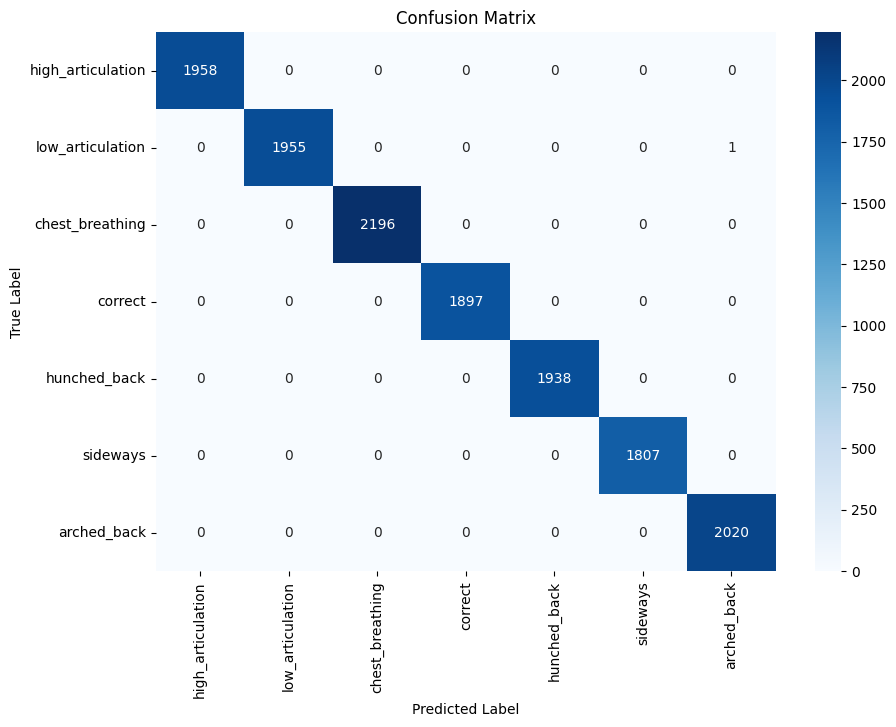

In [ ]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition')
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

# Evaluate on test set
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Only top 5 features

time: 8min 11s (started: 2024-07-22 10:18:45 +00:00)
Selected features:  Index(['computer_pose_landmark_6_z', 'computer_pose_landmark_7_z',
       'computer_pose_landmark_8_z', 'computer_pose_landmark_9_z',
       'computer_pose_landmark_12_z'],
      dtype='object')
Mean cross-validated F1 score: 0.868707951756495
f1 score:  0.8761608361995455
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.94      0.95      0.95      1958
 low_articulation       0.80      0.77      0.78      1956
  chest_breathing       0.89      0.90      0.90      2196
          correct       0.78      0.80      0.79      1897
     hunched_back       0.99      1.00      0.99      1938
         sideways       0.76      0.77      0.76      1807
      arched_back       0.96      0.93      0.95      2020

         accuracy                           0.88     13772
        macro avg       0.87      0.87      0.87     13772
     weighted avg       0.88      0.88

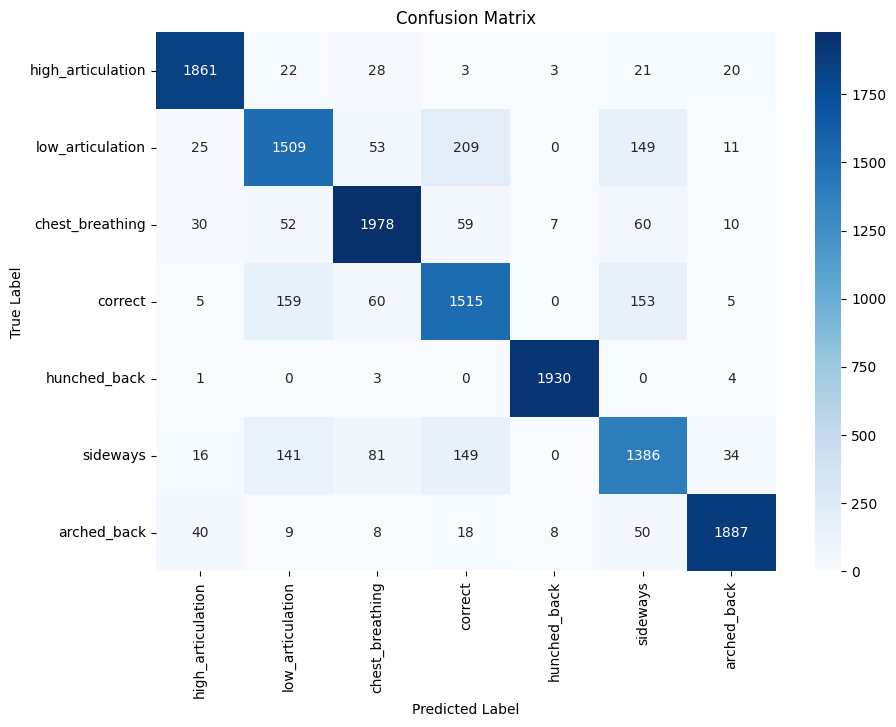

time: 3min 47s (started: 2024-07-22 10:26:58 +00:00)


In [ ]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

# 2. Audio only

In [9]:
modalities = [
    "audio"
]

time: 1.64 ms (started: 2024-07-22 15:15:07 +00:00)


Mean cross-validated F1 score: 0.5192863112800208
f1 score:  0.5282250905499986
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.52      0.52      0.52      1958
 low_articulation       0.50      0.56      0.53      1956
  chest_breathing       0.49      0.54      0.51      2196
          correct       0.60      0.55      0.57      1897
     hunched_back       0.52      0.52      0.52      1938
         sideways       0.56      0.52      0.54      1807
      arched_back       0.54      0.49      0.51      2020

         accuracy                           0.53     13772
        macro avg       0.53      0.53      0.53     13772
     weighted avg       0.53      0.53      0.53     13772



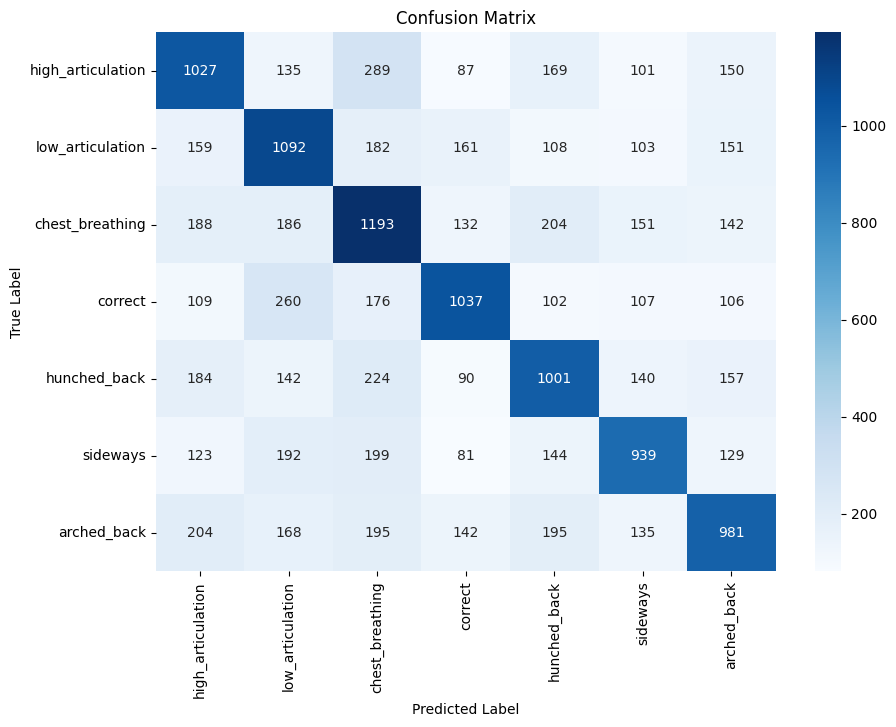

time: 9min 18s (started: 2024-07-22 10:30:45 +00:00)


In [ ]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Only top 5 audio features

Selected features:  Index(['computer_spec_cent', 'computer_tristimulus3', 'computer_mfcc_1',
       'computer_mfcc_3', 'computer_mfcc_7'],
      dtype='object')
Mean cross-validated F1 score: 0.2912423118673123
f1 score:  0.29118558859908766
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.29      0.31      0.30      1958
 low_articulation       0.29      0.29      0.29      1956
  chest_breathing       0.27      0.30      0.28      2196
          correct       0.33      0.32      0.33      1897
     hunched_back       0.27      0.27      0.27      1938
         sideways       0.32      0.28      0.30      1807
      arched_back       0.29      0.27      0.28      2020

         accuracy                           0.29     13772
        macro avg       0.29      0.29      0.29     13772
     weighted avg       0.29      0.29      0.29     13772



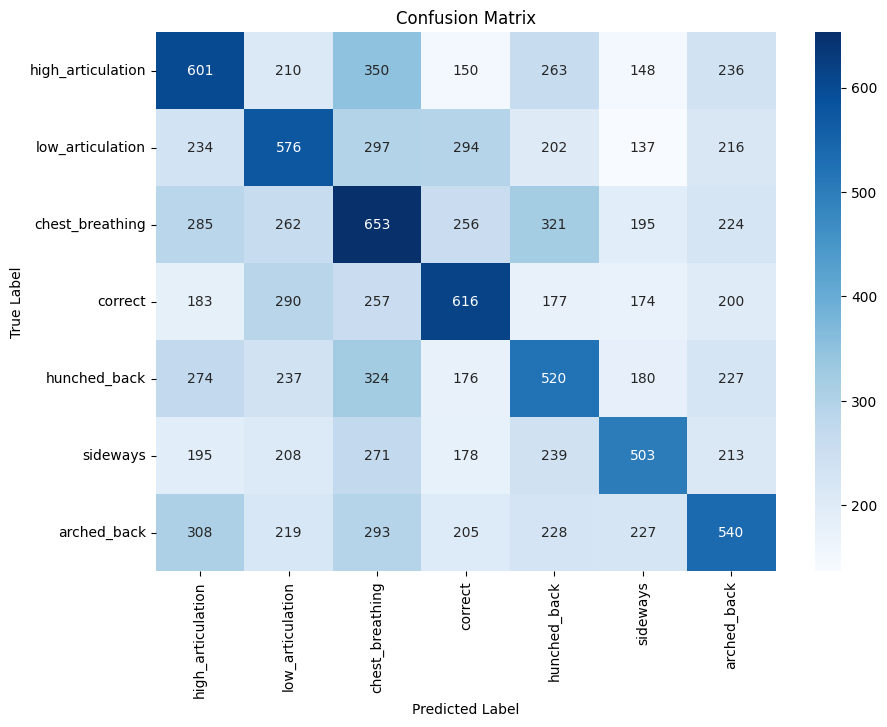

time: 4min 23s (started: 2024-07-22 10:40:04 +00:00)


In [ ]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### Trying different feature selectors

### CFS

Selected features:  ['computer_mfcc_7', 'computer_mfcc_8', 'computer_mfcc_9', 'computer_mfcc_5', 'computer_mfcc_4']
Mean cross-validated F1 score: 0.22960061043165622
f1 score:  0.2275229142352909
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.21      0.22      0.21      1958
 low_articulation       0.23      0.22      0.23      1956
  chest_breathing       0.22      0.25      0.23      2196
          correct       0.29      0.28      0.29      1897
     hunched_back       0.24      0.26      0.25      1938
         sideways       0.22      0.21      0.22      1807
      arched_back       0.18      0.15      0.17      2020

         accuracy                           0.23     13772
        macro avg       0.23      0.23      0.23     13772
     weighted avg       0.23      0.23      0.23     13772



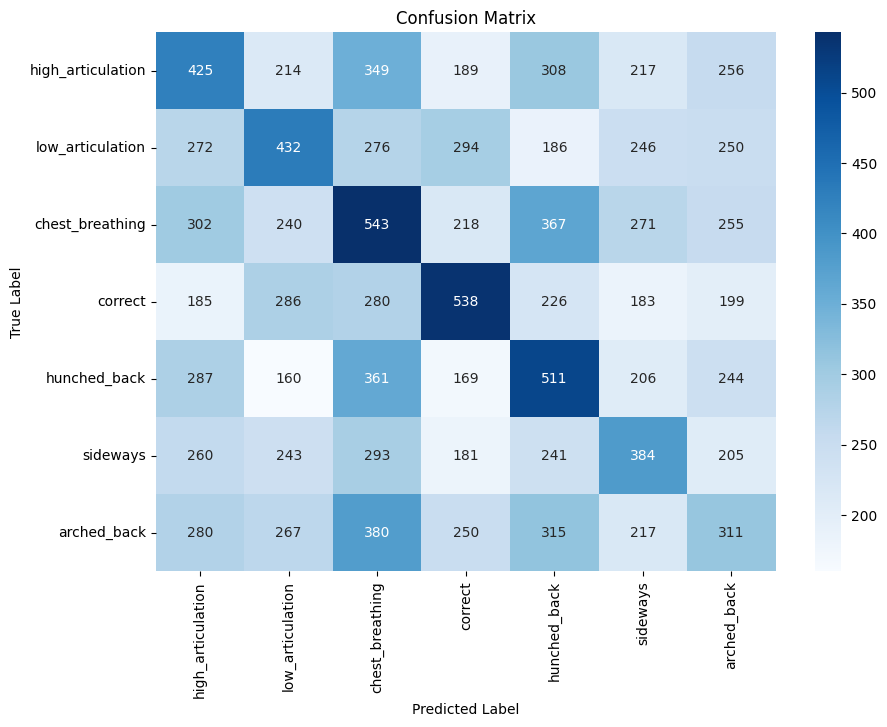

time: 4min 34s (started: 2024-07-22 10:44:27 +00:00)


In [ ]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='rf', feature_selection=3, modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### RFECV

Selected features:  Index(['computer_pitch', 'computer_rms_energy', 'computer_spec_cent',
       'computer_spec_spread', 'computer_spec_skew', 'computer_spec_kurt',
       'computer_spec_slope', 'computer_spec_decr', 'computer_spec_rolloff',
       'computer_spec_flat', 'computer_spec_crest', 'computer_tristimulus1',
       'computer_tristimulus2', 'computer_tristimulus3', 'computer_mfcc_1',
       'computer_mfcc_2', 'computer_mfcc_3', 'computer_mfcc_4',
       'computer_mfcc_5', 'computer_mfcc_6', 'computer_mfcc_7',
       'computer_mfcc_8', 'computer_mfcc_9', 'computer_mfcc_10',
       'computer_mfcc_11', 'computer_mfcc_12', 'computer_mfcc_13'],
      dtype='object')
Mean cross-validated F1 score: 0.5192863112800208
f1 score:  0.5282250905499986
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.52      0.52      0.52      1958
 low_articulation       0.50      0.56      0.53      1956
  chest_breathing       0.49      0.54   

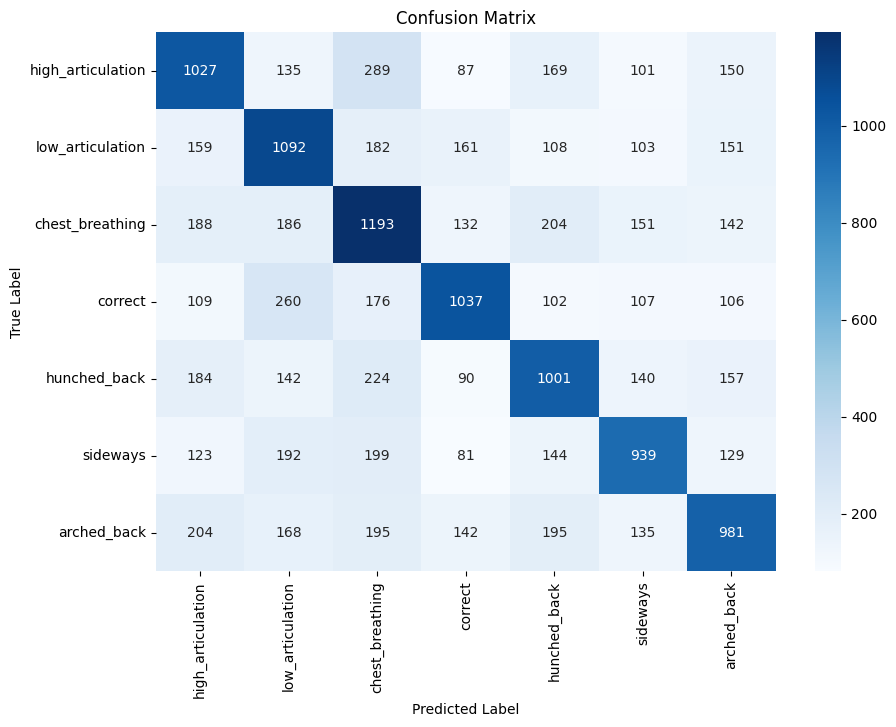

time: 1h 25min 49s (started: 2024-07-22 10:49:02 +00:00)


In [ ]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='rf', feature_selection=4, modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### PCA feature selection

Selected features:  ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
Mean cross-validated F1 score: 0.2834760504391264
f1 score:  0.28812300464543983
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.29      0.30      0.29      1958
 low_articulation       0.27      0.31      0.29      1956
  chest_breathing       0.29      0.30      0.30      2196
          correct       0.31      0.30      0.30      1897
     hunched_back       0.27      0.27      0.27      1938
         sideways       0.30      0.28      0.29      1807
      arched_back       0.29      0.27      0.28      2020

         accuracy                           0.29     13772
        macro avg       0.29      0.29      0.29     13772
     weighted avg       0.29      0.29      0.29     13772



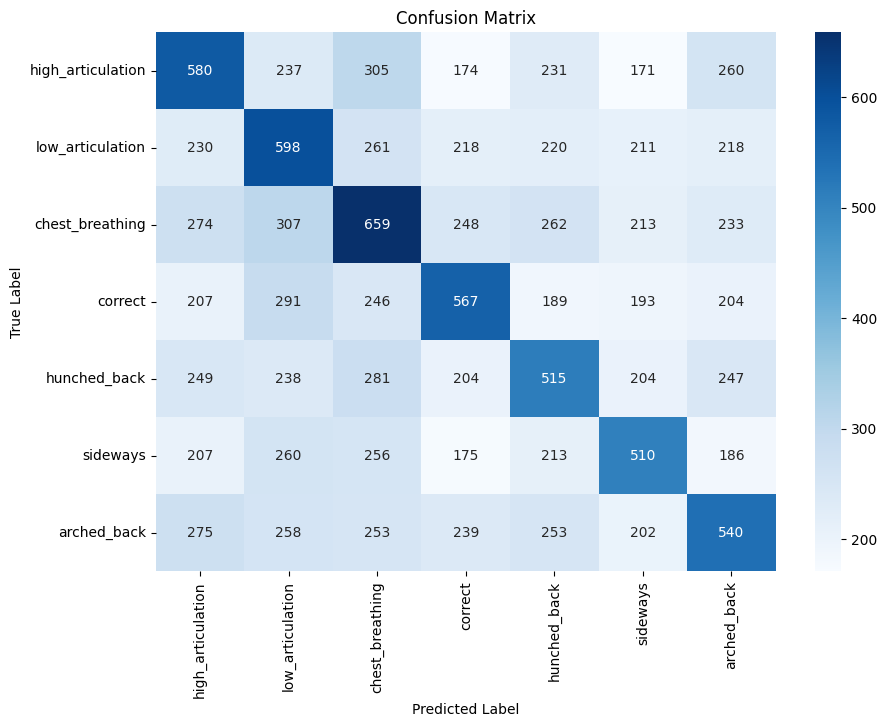

time: 4min 25s (started: 2024-07-22 12:14:51 +00:00)


In [ ]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', algorithm='rf', feature_selection=5, modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### Permutation Importance

In [ ]:
from feature_selectors import permutation_importance_selector

#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

# check what are the top features according to the permutation importance
num_features = 5  # Number of top features to select
x_train_transformed, selected_features = permutation_importance_selector(pipeline, x_train, y_train, num_features)

print(selected_features)

Mean cross-validated F1 score: 0.5192863112800208
Index(['computer_mfcc_9', 'computer_mfcc_5', 'computer_mfcc_7',
       'computer_spec_cent', 'computer_mfcc_3'],
      dtype='object')
time: 19min 40s (started: 2024-07-22 12:19:17 +00:00)


Mean cross-validated F1 score: 0.2625796267634521
f1 score:  0.2601041126545153
Classification Report:
                   precision    recall  f1-score   support

high_articulation       0.24      0.25      0.25      1958
 low_articulation       0.27      0.27      0.27      1956
  chest_breathing       0.26      0.30      0.28      2196
          correct       0.30      0.30      0.30      1897
     hunched_back       0.25      0.26      0.26      1938
         sideways       0.27      0.23      0.25      1807
      arched_back       0.24      0.21      0.22      2020

         accuracy                           0.26     13772
        macro avg       0.26      0.26      0.26     13772
     weighted avg       0.26      0.26      0.26     13772



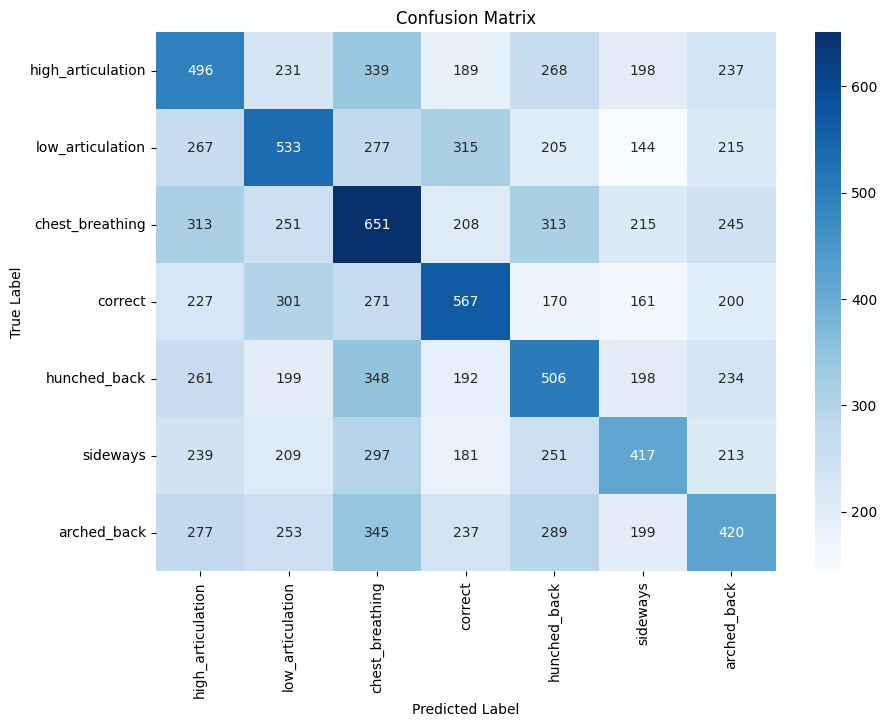

time: 4min 25s (started: 2024-07-22 12:38:57 +00:00)


In [ ]:
from utils import select_features

features = ['computer_mfcc_10', 'computer_mfcc_4', 'computer_spec_cent',
       'computer_mfcc_5', 'computer_mfcc_3']

#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

x = select_features(x, features)

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)

f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### Testing accuracy with different feature numbers - using k select best

In [7]:
import os
import json
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

time: 1.82 ms (started: 2024-07-22 15:14:47 +00:00)


In [ ]:
# Define file paths
results_file_path = '/content/drive/My Drive/THESIS/classifiers/feature_selection_results_rf_audio.json'

# Function to load results from the JSON file
def load_results(file_path):
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            return json.load(file)
    return {'num_features': [], 'feature_names': [], 'f1_score': [], 'classification_report': [], 'confusion_matrix': []}

# Function to append results to the JSON file
def append_results(file_path, results):
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            existing_results = json.load(file)
        for key in results:
            existing_results[key].extend(results[key])
        results = existing_results
    with open(file_path, 'w') as file:
        json.dump(results, file)

# Load existing results
results = load_results(results_file_path)

# Get the number of features processed so far
start_num_features = max(results['num_features']) + 1 if results['num_features'] else 1

# Loop over the number of features starting from where we left off
for num_features in range(start_num_features, 27):
    print("Testing: ", num_features)

    # Prepare data
    x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
    class_names = y.unique()

    # Drop constant columns
    constant_columns = [col for col in x.columns if x[col].nunique() == 1]
    x = x.drop(columns=constant_columns)

    # Feature selection
    selector = SelectKBest(f_classif, k=num_features)
    x_new = selector.fit_transform(x, y)
    selected_mask = selector.get_support()
    selected_features = x.columns[selected_mask]
    print(selected_features)

    # Split data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

    # Train and evaluate the model
    pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
    f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

    print(class_report)

    # Store results
    new_results = {
        'num_features': [num_features],
        'feature_names': [selected_features.tolist()],
        'f1_score': [f1],
        'classification_report': [class_report],
        'confusion_matrix': [conf_matrix.tolist()]
    }

    # Append new results to the JSON file
    append_results(results_file_path, new_results)


Testing:  6
Index(['computer_spec_cent', 'computer_tristimulus3', 'computer_mfcc_1',
       'computer_mfcc_3', 'computer_mfcc_7', 'computer_mfcc_10'],
      dtype='object')
Mean cross-validated F1 score: 0.31959045130326974
                   precision    recall  f1-score   support

high_articulation       0.31      0.33      0.32      1958
 low_articulation       0.31      0.33      0.32      1956
  chest_breathing       0.30      0.33      0.32      2196
          correct       0.37      0.36      0.37      1897
     hunched_back       0.31      0.31      0.31      1938
         sideways       0.35      0.30      0.32      1807
      arched_back       0.32      0.29      0.31      2020

         accuracy                           0.32     13772
        macro avg       0.32      0.32      0.32     13772
     weighted avg       0.32      0.32      0.32     13772

Testing:  7
Index(['computer_spec_cent', 'computer_tristimulus1', 'computer_tristimulus3',
       'computer_mfcc_1', 'comput

In [ ]:
# Load final results
final_results = load_results(results_file_path)

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(final_results)

# Find the best result
best_idx = results_df['f1_score'].idxmax()
best_num_features = results_df.loc[best_idx, 'num_features']
best_f1_score = results_df.loc[best_idx, 'f1_score']
best_class_report = results_df.loc[best_idx, 'classification_report']
best_conf_matrix = results_df.loc[best_idx, 'confusion_matrix']

# Print the best result
print(f"Best number of features: {best_num_features}")
print(f"Best F1 score: {best_f1_score}")
print("Best Classification Report:")
print(best_class_report)

# Plot confusion matrix for best result
plot_confusion_matrix(best_conf_matrix, class_names=class_names)

# Plot the accuracy for each number of features
plt.figure(figsize=(10, 6))
plt.plot(results_df['num_features'], results_df['f1_score'], marker='o')
plt.xlabel('Number of Features')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Number of Features')
plt.grid(True)
plt.show()

# 3. Video only

In [ ]:
modalities = [
    "video"
]

In [ ]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

#### Only top 5 video features

In [ ]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, num_features=5)
class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

# 4. Biosignal Only

In [ ]:
modalities = [
    "biosignals"
]

In [ ]:
#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities)
class_names = y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

# 5. Separating classification task into smaller tasks

These models are tested only with the top 5 features selection and just audio.

## Posture.

All audio features

In [ ]:
conditions_to_remove = ['high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['audio']

#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

Top 5

In [ ]:
conditions_to_remove = ['high_articulation', 'low_articulation', 'chest_breathing']
modalities = ['audio']

#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', classify='recording_condition', num_features=5, modalities=modalities, conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

## Other error conditions

In [ ]:
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways']

#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', feature_selection=2, classify='recording_condition', num_features=5, modalities=['audio'], conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

### CFS feature selection

In [ ]:
conditions_to_remove = ['arched_back', 'hunched_back', 'sideways']

#prepare data
x, y = prepare_data(DATA_FILE, audio_source='computer', feature_selection=3, classify='recording_condition', num_features=5, modalities=['audio'], conditions_to_remove=conditions_to_remove, column_name='recording_condition')

class_names=y.unique()

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

#train and evaluate the model
pipeline = train_random_forest(x_train, y_train, n_estimators=100, random_state=RANDOM_STATE)
f1, class_report, conf_matrix = evaluate_random_forest(pipeline, x_test, y_test, class_names)

print("f1 score: ", f1)
print("Classification Report:")
print(class_report)

plot_confusion_matrix(conf_matrix, class_names=class_names)

###